In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [ ]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

**Investigating area-wise data**

In [ ]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

**Dropping availablity, society etc as they are assumed to have no effect on prices**

In [ ]:
df2 = df1.drop(["area_type", "society", "balcony", "availability"], axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data cleaning

In [ ]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

**Exploring sqft**

In [ ]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


*   We cannot have 2400 (small area) for 43 bhk
*   Need to explore total_sqft feature



In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

*   We can see a range '1133 - 13844'
*   Can take average of these two values for such cases
*   Can define a function to check whether value is float or not for this





In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df3[~df3["total_sqft"].apply(is_float)].head(10)     # neagte function(~) will return a dataframe for values which are not float

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


*   Can see values other than range, like sq. meter, perch
*   Data is not uniform


*   We are going to take avrage wherever ther is range, and drop other cases, can convert them if we want to





In [ ]:
def convert_sqft_to_float(x):
  items = x.split("-")
  if len(items) == 2:
    return (float(items[0])+float(items[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_float)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
# checking for index 30
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [ ]:
df5 = df4.copy()
# create price per sqft column
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**Exploring location**

In [ ]:
len(df5.location.unique())

1304

*   Too much dimensions
*   Need to reduce this

*   Out of 1304 locations, many will have very few data points





In [ ]:
df5.location = df5.location.apply(lambda x: x.strip())    # remove any leading space in the data
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

*   Any location having <= 10 data points can be calles "other location"



In [ ]:
len(location_stats[location_stats <= 10])

1052

In [ ]:
location_stats_lt_10 = location_stats[location_stats<=10]
location_stats_lt_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [ ]:
len(df5.location.unique())

1293

In [ ]:
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_lt_10 else x)
len(df5.location.unique())

242

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df5.shape

(13246, 7)

## Outlier Detection and Removal



*   We will now check outliers for sqft per bedroom
*   Ususally it is around 300, it can be taken as a threshold



In [ ]:
df5[df5.total_sqft/df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649




*   740 entries out of 13246 are thus, outliers
*   We can remove them 



In [ ]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]

In [ ]:
df6.shape

(12502, 7)



*   We will now check price_per_sqft



In [ ]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64



*   Min is too unusual in Banaglore
*   Makes sense to remove these extreme cases





In [ ]:
# we will filter out data points beyond 1 std
def remove_price_per_sqft_outliers(df):
  df_fin = pd.DataFrame()
  for x, x_df in df.groupby("location"):         # location wise as price differes location to location
    mu = np.mean(x_df.price_per_sqft)
    sigma = np.std(x_df.price_per_sqft)
    red_df = x_df[(x_df.price_per_sqft>(mu-sigma)) & (x_df.price_per_sqft<(mu+sigma))]
    df_fin = pd.concat([df_fin,red_df], ignore_index=True)
  return df_fin

In [ ]:
df7 = remove_price_per_sqft_outliers(df6)

In [ ]:
df7.shape

(10241, 7)



*   We will check if the property_price difference makes sense when no of bhk id different but total_sqft is close



In [ ]:
# visualization for this 
def plot_scatter_plot(df,location):
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]

  matplotlib.rcParams["figure.figsize"] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label="2bhk", s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, marker="+", color="green", label="3bhk", s=50)
  plt.xlabel("total_sqft")
  plt.ylabel("price")
  plt.title(location)
  plt.legend()

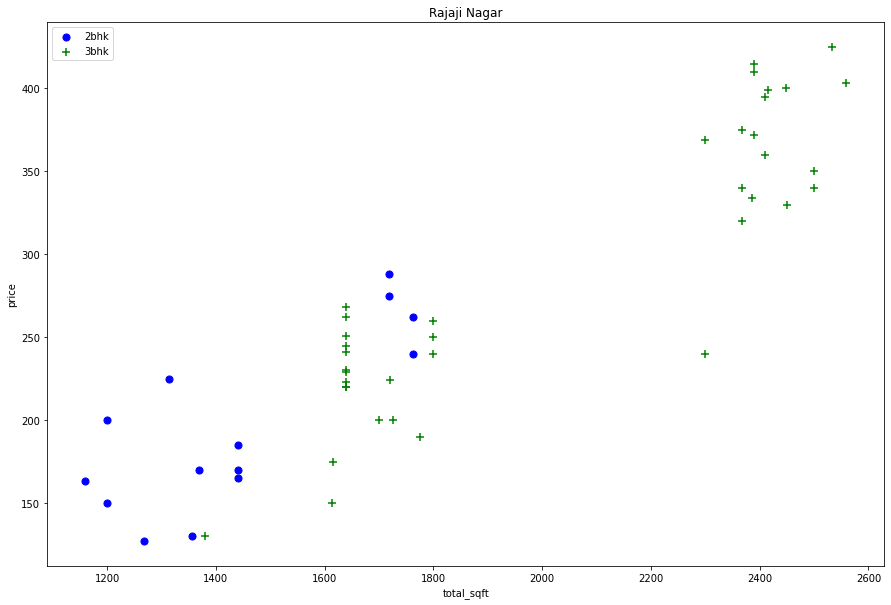

In [ ]:
plot_scatter_plot(df7,"Rajaji Nagar")

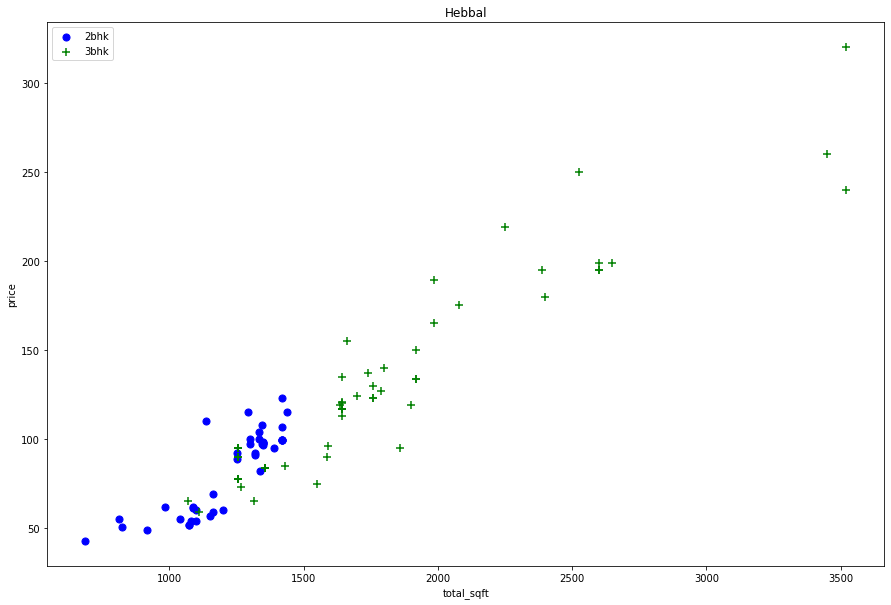

In [ ]:
plot_scatter_plot(df7,"Hebbal")



*   We see that for some total_sqft's, the price of 2bhk is higher than that of 3 bhk
*   We will remove those outliers



In [ ]:
def remove_bhk_outliers(df):
  del_index = np.array([])
  for location, location_df in df.groupby("location"):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby("bhk"):
      bhk_stats[bhk] = {
          "mean": np.mean(bhk_df.price_per_sqft),
          "std": np.std(bhk_df.price_per_sqft),
          "num": bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby("bhk"):
      stats = bhk_stats.get(bhk-1)
      if stats and stats["num"]>5:
        del_index = np.append(del_index, bhk_df[bhk_df.price_per_sqft<(stats["mean"])].index.values)
  return df.drop(del_index, axis="index")

In [ ]:
df8 = remove_bhk_outliers(df7)

In [ ]:
df8.shape

(7329, 7)

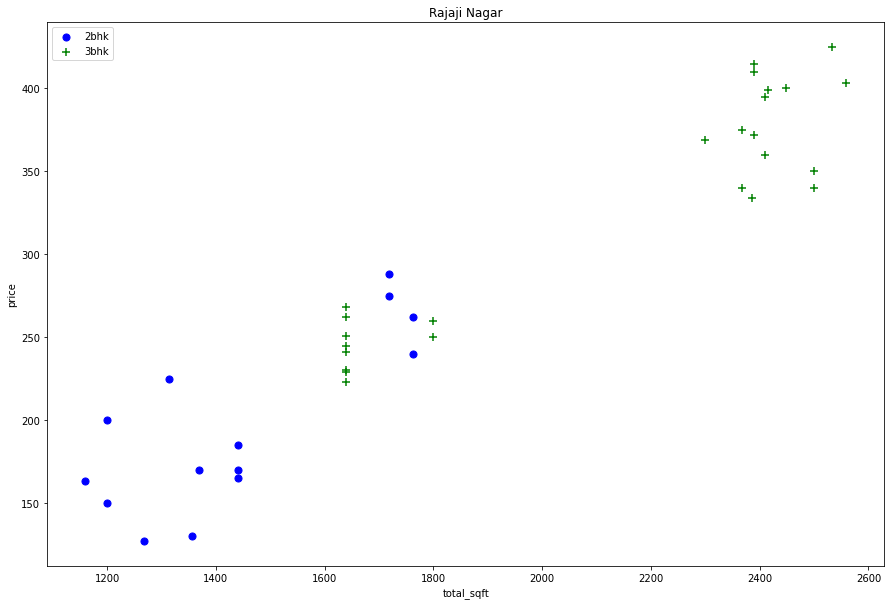

In [ ]:
plot_scatter_plot(df8,"Rajaji Nagar")

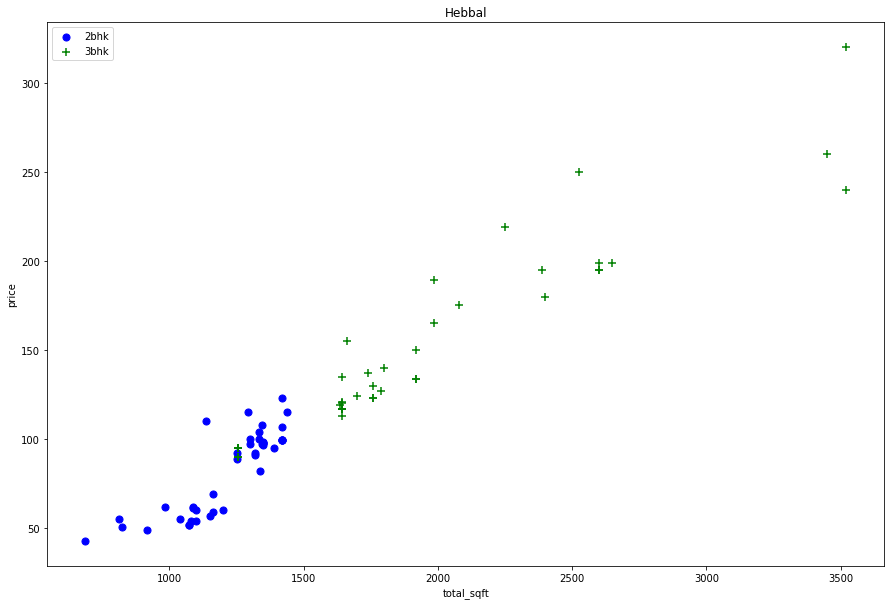

In [ ]:
plot_scatter_plot(df8,"Hebbal")



*   There is still a little abnormality but it is fine to have



Text(0, 0.5, 'num')

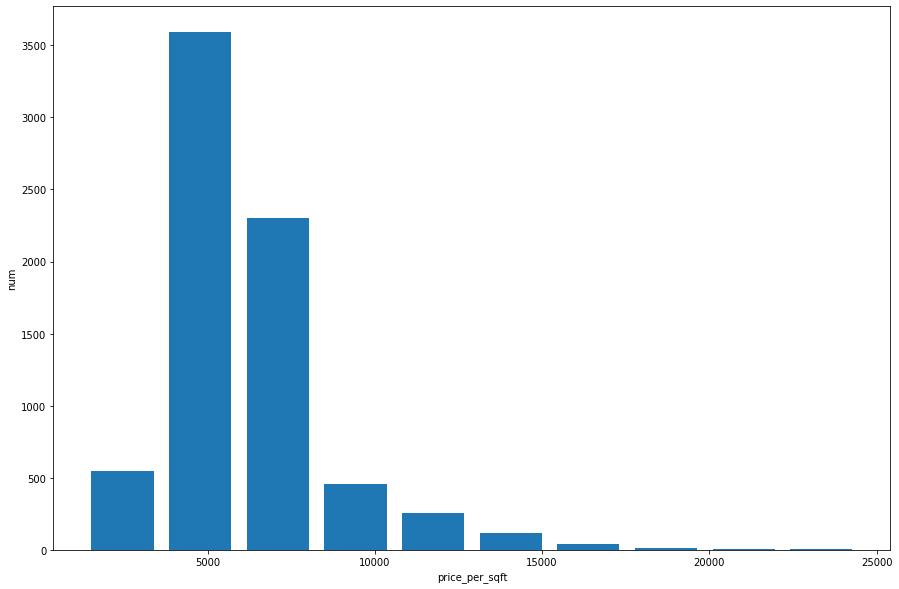

In [ ]:
# histogram to see how the no of houses are distributed according to price
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("num")


*   Majaority of data points lie between 0 and 1000
*   Looks like a bell curve too





*   We will now explore the numbe rof baths



In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424




*   Entries having no. of bathrooms > no.of bhk + 2, can be considered as outliers and be removed



Text(0, 0.5, 'no. of houses')

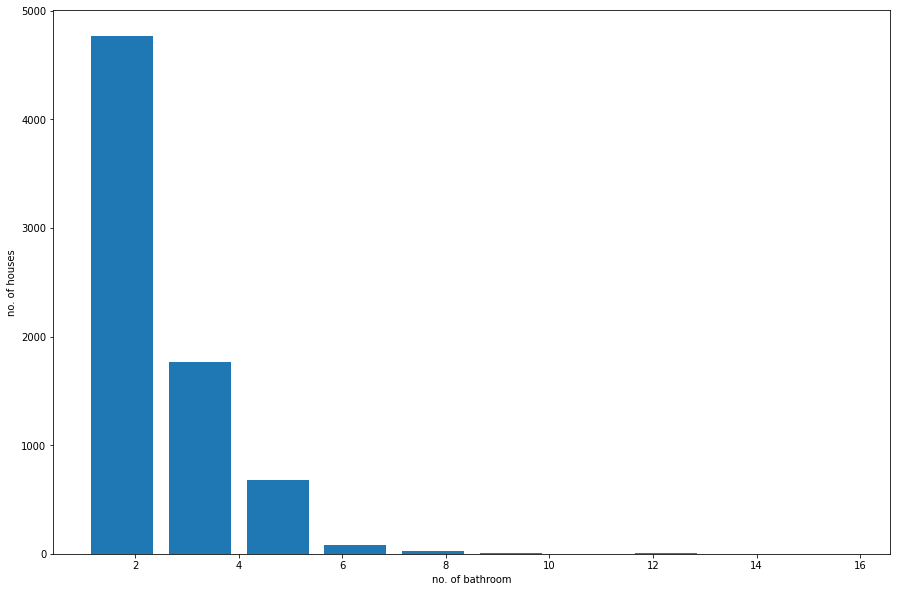

In [ ]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("no. of bathroom")
plt.ylabel("no. of houses")

In [ ]:
df8[df8.bath > df8.bhk+2]           

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df9 = df8[df8.bath <= df8.bhk+2]

In [ ]:
df9.shape

(7325, 7)

*   Our data is ready for modelling, we just have to remove some unnecessary features
*   We can drop size as we have bhk, and price_per_sqft as it is only for outlier detection



In [ ]:
df10 = df9.drop(["size", "price_per_sqft"], axis="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Modelling processed data



*   Need to convert text information into numerical information
*   We will use pandas dummies method for this



In [ ]:
dummies = pd.get_dummies(df10.location)

In [ ]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10, dummies.drop("other", axis="columns")], axis="columns")     # to avoid dummy variable trp, we should have one less column in dummies, it will still represent the same

In [ ]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12 = df11.drop("location", axis="columns")

In [ ]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df12.shape

(7325, 245)

In [ ]:
# independent variable is x, and dependent variable is price
x = df12.drop("price", axis="columns") 

In [ ]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df12.price            #dependent variable

In [ ]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

*   Model data is now ready





**Train - Test data split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

**Trying Linear Regression (one method)**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)      #model evaluation

0.8017674308563898

In [ ]:
from sklearn.model_selection import ShuffleSplit         #will shuffle data points and then split
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

Now we have to try other algorithms to see which gives better results

**Grid Search CV**
*   Tries different regressors and paramters and returns the best 



In [ ]:
from sklearn.model_selection import GridSearchCV
#trying two other regressors apart from linear regression 
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def best_model(x,y):
  algos = {
      "linear_regression": {
          "model": LinearRegression(),
          "params": {
              "normalize": [True, False]
          }
      },
      "lasso": {
          "model": Lasso(),
          "params": {
              "alpha": [1,2],
              "selection": ["random", "cyclic"]
          }
      },
      "decision_tree": {
          "model": DecisionTreeRegressor(),
          "params": {
              "criterion": ["mse", "friedman_mse"],
              "splitter": ["best", "random"]
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, algo_config in algos.items():
    gs = GridSearchCV(algo_config["model"], algo_config["params"], cv=cv, return_train_score=False)
    gs.fit(x,y)
    scores.append({
        "model": algo_name,
        "best_score": gs.best_score_,
        "best_params": gs.best_params_
    })
  return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

In [ ]:
best_model(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,0.834855,{'normalize': True}
1,lasso,0.684330,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.744529,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Best model is Linear Regression

**Predict price using Linear Regression model**

In [ ]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
#testing out
np.where(x.columns == "5th Block Hbr Layout")[0][0]

7

In [ ]:
def price_prediction(location, sqft, bath, bhk):
  loc_i = np.where(x.columns == location)[0][0]
  m = np.zeros(len(x.columns))
  m[0] = sqft
  m[1] = bath
  m[2] = bhk
  if loc_i >= 0:
    m[loc_i] = 1
  return model.predict([m])[0]

In [ ]:
price_prediction("Vishveshwarya Layout", 1100, 3, 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


32.61760185590066

In [ ]:
price_prediction("Vishveshwarya Layout", 1100, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


37.69570129577622

In [ ]:
price_prediction("Indira Nagar", 1100, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


193.10139020908986

In [ ]:
price_prediction("Indira Nagar", 1100, 3, 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


188.02329076921433

In [ ]:
price_prediction("Indira Nagar", 1100, 3, 4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


181.71208634028312

Increasing no of bedrooms while keeping rest same is giving lower value
*   Data is such
*   Reason can be that increasing no of bedrooms causes decrease in area of each bedroom



## Exporting Model for Website

In [113]:
# importing model
import pickle
with open("bangalore_home_prices_model.pickle", "wb") as f:
  pickle.dump(model,f)

In [114]:
# importing column names for model
import json
columns = {
    "data_columns": [col.lower() for col in x.columns]
}
with open("columns.json", "w") as f:
  f.write(json.dumps(columns))

Files will be used for python flask server